In [28]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

#### 1. Загрузите данные ex8data1.mat из файла.

In [29]:
data1 = scio.loadmat('data/Lab 8/ex8data1.mat')
X, Xval, yval = data1['X'], data1['Xval'], data1['yval'][:, 0]

#### 2. Постройте график загруженных данных в виде диаграммы рассеяния.

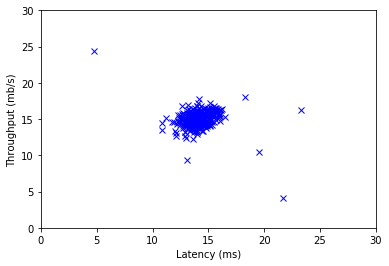

In [30]:
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

#### 3. Представьте данные в виде двух независимых нормально распределенных случайных величин.

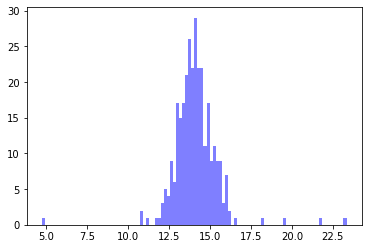

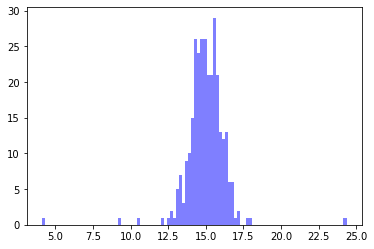

In [31]:
plt.hist(X[:, 0], 100, facecolor='blue', alpha=0.5)
plt.show()

plt.hist(X[:, 1], 100, facecolor='blue', alpha=0.5)
plt.show()

#### 4. Оцените параметры распределений случайных величин.

In [32]:
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.mean(np.square(X - mu), axis=0)
    return mu, sigma2

In [33]:
mu, sigma2 = estimateGaussian(X)
print(f'mu = {mu}, sigma = {sigma2}')

mu = [14.11222578 14.99771051], sigma = [1.83263141 1.70974533]


#### 5. Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

In [34]:
def multivariateGaussian(X, mu, sigma2):
    k = len(mu)
    if sigma2.ndim == 1 or (sigma2.ndim == 2 and (sigma2.shape[1] == 1 or sigma2.shape[0] == 1)):
        sigma2 = np.diag(sigma2)
    X = X - mu
    p = (2 * np.pi) ** (-k / 2) * np.linalg.det(sigma2) ** (-0.5) * \
        np.exp(-0.5 * np.sum(np.dot(X, np.linalg.pinv(sigma2)) * X, axis=1))
    return p

In [35]:
def visualizeFit(X, mu, sigma2):
    grid = np.arange(0, 35.5, 0.5)
    x1, x2 = np.meshgrid(grid, grid)

    Z = multivariateGaussian(
        np.c_[x1.flatten('F'), x2.flatten('F')], mu, sigma2)
    Z = Z.reshape(x1.shape, order='F')

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], marker='x', c='b', s=15, linewidth=1)

    # Do not plot if there are infinities
    if np.sum(np.isinf(X)) == 0:
        lvls = 10 ** np.arange(-20, 0, 3).astype(np.float)
    plt.contour(x1, x2, Z, levels=lvls, colors='r', linewidths=0.7)
    

Text(0, 0.5, 'Throughput (mb/s)')

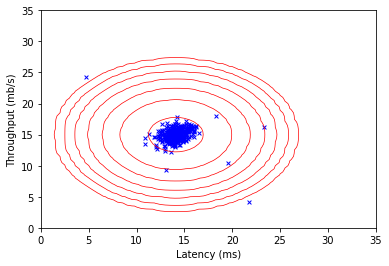

In [36]:
p = multivariateGaussian(X, mu, sigma2)
visualizeFit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

#### 6. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

In [37]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0

    stepsize = (max(pval) - min(pval)) / 1000
    for epsilon in np.arange(min(pval), max(pval), stepsize):
        tp = sum((yval == 1) & (pval < epsilon))
        fp = sum((yval == 1) & (pval >= epsilon))
        fn = sum((yval == 0) & (pval < epsilon))
        
        if tp + fp == 0 or tp + fn == 0:
            F1 = -1
        else:
            prec = tp / (tp + fp)
            rec = tp / (tp + fn)
            F1 = 2 * prec * rec / (prec + rec)

        if F1 > bestF1:
            bestEpsilon = epsilon
            bestF1 = F1
            
    return bestEpsilon, bestF1

In [38]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: ', epsilon)
print('Best F1 on Cross Validation Set: ', F1)

Best epsilon found using cross-validation:  8.990852779269495e-05
Best F1 on Cross Validation Set:  0.8750000000000001


#### 7. Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.

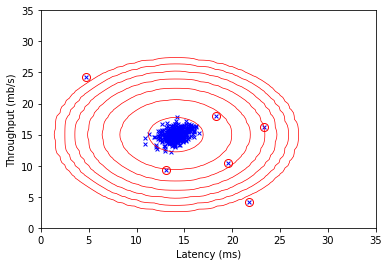

In [39]:
outliers = np.where(p < epsilon)
p = multivariateGaussian(X, mu, sigma2)
visualizeFit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', mfc='none', ms=8)
plt.show()

#### 8. Загрузите данные ex8data2.mat из файла.

In [40]:
data2 = scio.loadmat('data/Lab 8/ex8data2.mat')
X, Xval, yval = data2['X'], data2['Xval'], data2['yval'][:, 0]

#### 9. Представьте данные в виде 11-мерной нормально распределенной случайной величины.

In [41]:
def plot_distribution(ax, X):
    ax.hist(X, 100, facecolor='blue', alpha=0.5)

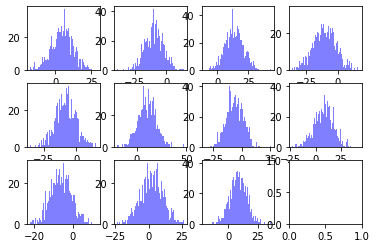

In [42]:
fig, axes = plt.subplots(3, 4)
axes[0, 0].hist(X[:, 0], 100, facecolor='blue', alpha=0.5)
axes[0, 1].hist(X[:, 1], 100, facecolor='blue', alpha=0.5)
axes[0, 2].hist(X[:, 2], 100, facecolor='blue', alpha=0.5)
axes[0, 3].hist(X[:, 3], 100, facecolor='blue', alpha=0.5)
axes[1, 0].hist(X[:, 4], 100, facecolor='blue', alpha=0.5)
axes[1, 1].hist(X[:, 5], 100, facecolor='blue', alpha=0.5)
axes[1, 2].hist(X[:, 6], 100, facecolor='blue', alpha=0.5)
axes[1, 3].hist(X[:, 7], 100, facecolor='blue', alpha=0.5)
axes[2, 0].hist(X[:, 8], 100, facecolor='blue', alpha=0.5)
axes[2, 1].hist(X[:, 9], 100, facecolor='blue', alpha=0.5)
axes[2, 2].hist(X[:, 10], 100, facecolor='blue', alpha=0.5)
plt.show()

#### 10. Оцените параметры распределения случайной величины.

In [43]:
mu, sigma2 = estimateGaussian(X)
print(f'mu = {mu}, sigma = {sigma2}')

mu = [  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252], sigma = [60.97489373 53.20572186 58.51546272 84.20403725 65.26859177 89.57487757
 55.63349911 87.16233783 29.62926829 70.7852052  50.50356719]


#### 11. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

In [44]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: ', epsilon)
print('Best F1 on Cross Validation Set: ', F1)

Best epsilon found using cross-validation:  1.377228890761358e-18
Best F1 on Cross Validation Set:  0.6153846153846154


#### 12. Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?

In [45]:
p = multivariateGaussian(X, mu, sigma2)
print('Outliers found: ', np.sum(p < epsilon))

Outliers found:  117


Было обнаружено 117 аномальных наблюдений.

Был подобран парог e = 1.377 * 10 ^ (-18)